# Customer Churn Analysis
Notebook: data generation → EDA → feature engineering → modeling → evaluation → save outputs


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib, os

In [18]:
os.makedirs('output_churn', exist_ok=True)

In [21]:
import random
import numpy as np

In [22]:
np.random.seed(42)
n = 3000

In [29]:
np.random.seed(48)
print('random.seed')

random.seed


# --- Data generation (columns shown) --

In [2]:
pd.read_csv(r'C:\Users\hp\Downloads\churn_cleaned.csv')

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,senior_citizen,gender,partner,dependents,paperless_billing,churn,tenure_bucket,high_monthly_flag,support_per_month,churn_label
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,0,Male,1,0,0,0,04-Jun,1,0.000000,No
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,1,0,25-60,0,0.027778,No
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,0,0,13-24,1,0.066667,No
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,0,Male,0,0,1,0,07-Dec,0,0.100000,No
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,0,Male,1,0,0,0,0-3,1,0.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,CUST102995,24,120.25,2902.62,Month-to-month,Mailed check,DSL,1,1,1,0,Female,1,1,0,1,13-24,1,0.041667,Yes
2996,CUST102996,2,61.76,104.70,Month-to-month,Credit card,Fiber optic,1,1,1,0,Female,1,0,1,1,0-3,0,0.500000,Yes
2997,CUST102997,4,5.00,35.80,Month-to-month,Bank transfer,DSL,1,1,1,0,Female,1,0,1,0,04-Jun,0,0.250000,No
2998,CUST102998,4,10.03,69.31,Month-to-month,Bank transfer,No,2,3,0,0,Male,1,1,0,0,04-Jun,0,0.500000,No


In [33]:
df.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,paperless_billing,senior_citizen,gender,partner,dependents,churn,tenure_bucket,high_monthly_flag,support_per_month
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,0,0,Female,0,1,0,4-6,1,0.000000
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,1,0,Male,0,0,1,25-60,0,0.027778
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,1,0,Male,1,1,0,13-24,1,0.066667
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,0,0,Female,1,1,0,7-12,0,0.100000
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,1,0,Male,0,1,1,0-3,1,0.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         3000 non-null   object  
 1   tenure             3000 non-null   int64   
 2   monthly_charges    3000 non-null   float64 
 3   total_charges      3000 non-null   float64 
 4   contract           3000 non-null   object  
 5   payment_method     3000 non-null   object  
 6   internet_service   3000 non-null   object  
 7   support_calls      3000 non-null   int32   
 8   num_products       3000 non-null   int64   
 9   autopay            3000 non-null   int64   
 10  paperless_billing  3000 non-null   int64   
 11  senior_citizen     3000 non-null   int64   
 12  gender             3000 non-null   object  
 13  partner            3000 non-null   int64   
 14  dependents         3000 non-null   int64   
 15  churn              3000 non-null   int32   
 16  tenure

In [38]:
df.describe()

,tenure,monthly_charges,total_charges,support_calls,num_products,autopay,paperless_billing,senior_citizen,partner,dependents,churn,high_monthly_flag,support_per_month
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.551333,69.565787,795.016867,1.247667,1.490667,0.582333,0.598333,0.113333,0.494667,0.489667,0.228333,0.250000,0.363635
std,11.970789,29.611538,940.102173,1.141386,0.660852,0.493257,0.490317,0.317053,0.500055,0.499977,0.419829,0.433085,0.659203
min,0.000000,5.000000,-180.050000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,48.767500,160.265000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,69.635000,478.335000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263
75%,16.000000,89.555000,1087.630000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.250000,0.333333
max,98.000000,187.790000,7405.480000,8.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [39]:
df['churn'].value_counts(normalize=True)

churn
0    0.771667
1    0.228333
Name: proportion, dtype: float64

In [43]:
df.to_csv('output_churn/churn_cleaned.csv', index=False)

# EDA plots
 #churn distribution

In [3]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import roc_curve, auc
# load cleaned data (adjust path if needed)
df = pd.read_csv(r'C:\Users\hp\Downloads\churn_cleaned.csv')   
df.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,senior_citizen,gender,partner,dependents,paperless_billing,churn,tenure_bucket,high_monthly_flag,support_per_month,churn_label
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,0,Male,1,0,0,0,04-Jun,1,0.000000,No
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,1,0,25-60,0,0.027778,No
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,0,0,13-24,1,0.066667,No
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,0,Male,0,0,1,0,07-Dec,0,0.100000,No
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,0,Male,1,0,0,0,0-3,1,0.000000,No


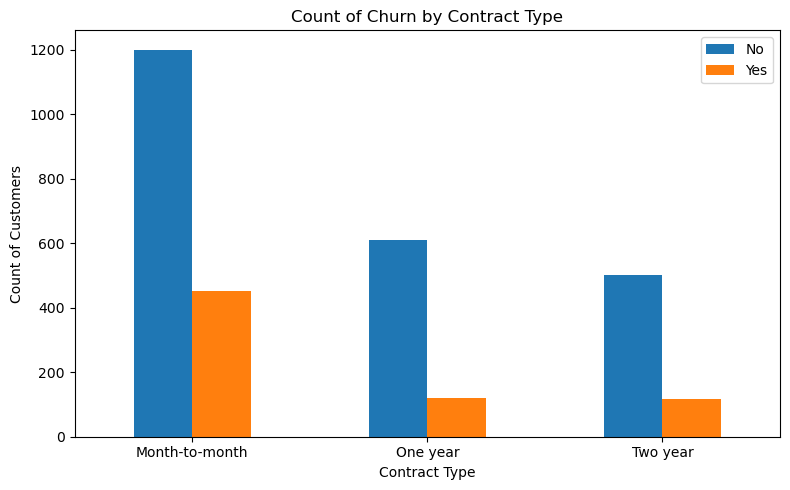

In [4]:
ct = pd.crosstab(df['contract'], df['churn'])
ct.columns = ['No','Yes']   # 0 -> No, 1 -> Yes

ax = ct.plot(kind='bar', figsize=(8,5))
ax.set_title('Count of Churn by Contract Type')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Count of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Churn proportion by Contract type

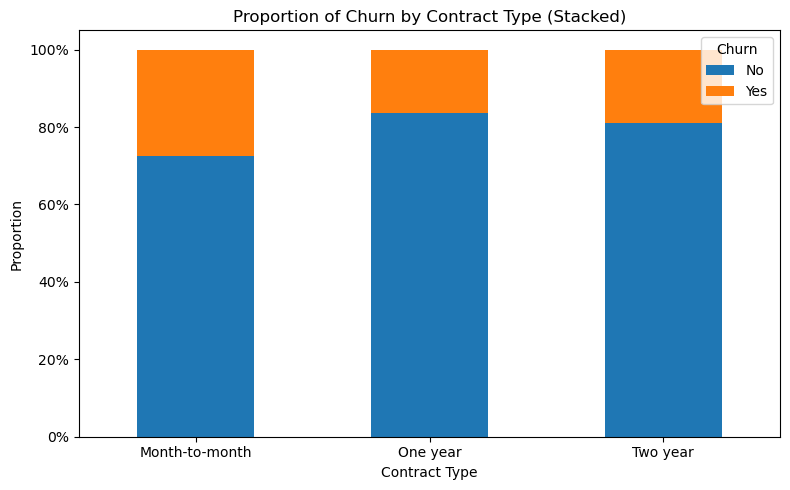

In [5]:
ct_pct = ct.div(ct.sum(axis=1), axis=0)   # row-wise percentage
ax = ct_pct.plot(kind='bar', stacked=True, figsize=(8,5))
ax.set_title('Proportion of Churn by Contract Type (Stacked)')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Proportion')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: "{:.0%}".format(y)))
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

# Churn rate by Internet Service and Payment Method

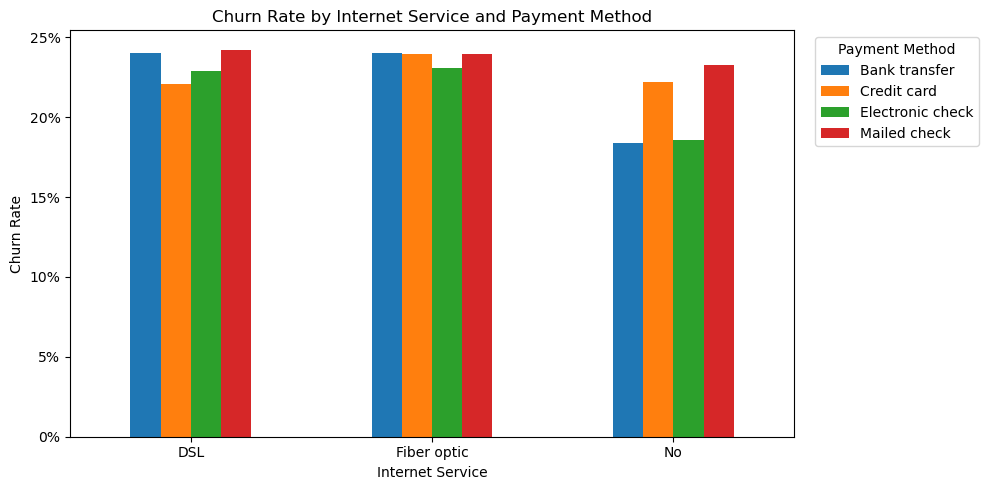

In [6]:
pivot = pd.crosstab(index=df['internet_service'], columns=df['payment_method'], values=df['churn'], aggfunc='mean').fillna(0)
# pivot contains churn rate (0-1) for each cell
fig, ax = plt.subplots(figsize=(10,5))
pivot.plot(kind='bar', ax=ax)
ax.set_title('Churn Rate by Internet Service and Payment Method')
ax.set_xlabel('Internet Service')
ax.set_ylabel('Churn Rate')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: "{:.0%}".format(y)))
plt.xticks(rotation=0)
plt.legend(title='Payment Method', bbox_to_anchor=(1.02,1), loc='upper left')
plt.tight_layout()
plt.show()

# Boxplot: Monthly charges by churn

C:\Users\hp\AppData\Local\Temp\ipykernel_29600\1021774856.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data_no, data_yes], labels=['No Churn','Churn'])


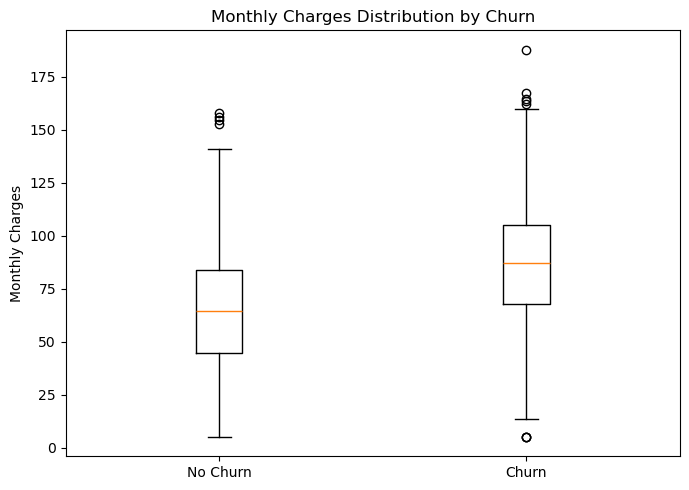

In [7]:
fig, ax = plt.subplots(figsize=(7,5))
data_no = df[df.churn==0]['monthly_charges']
data_yes = df[df.churn==1]['monthly_charges']
ax.boxplot([data_no, data_yes], labels=['No Churn','Churn'])
ax.set_title('Monthly Charges Distribution by Churn')
ax.set_ylabel('Monthly Charges')
plt.tight_layout()
plt.show()

# Violin-like: density overlay using hist

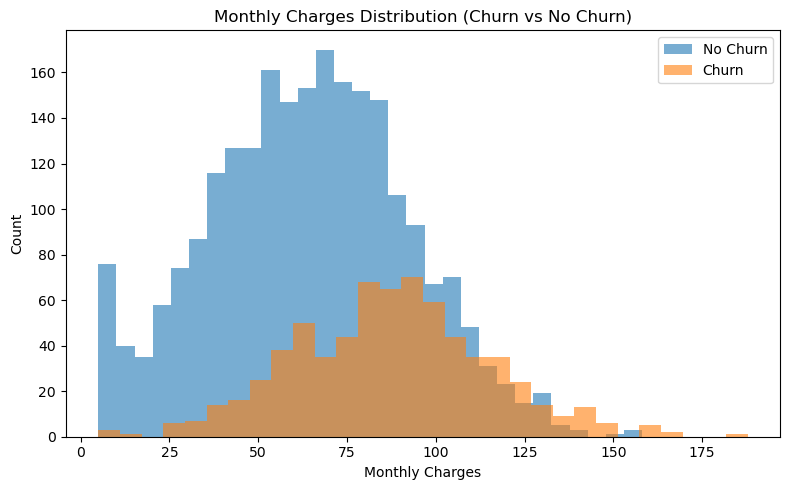

In [8]:
plt.figure(figsize=(8,5))
plt.hist(df[df.churn==0]['monthly_charges'], bins=30, alpha=0.6, label='No Churn')
plt.hist(df[df.churn==1]['monthly_charges'], bins=30, alpha=0.6, label='Churn')
plt.title('Monthly Charges Distribution (Churn vs No Churn)')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# churn rate by tenure bucket

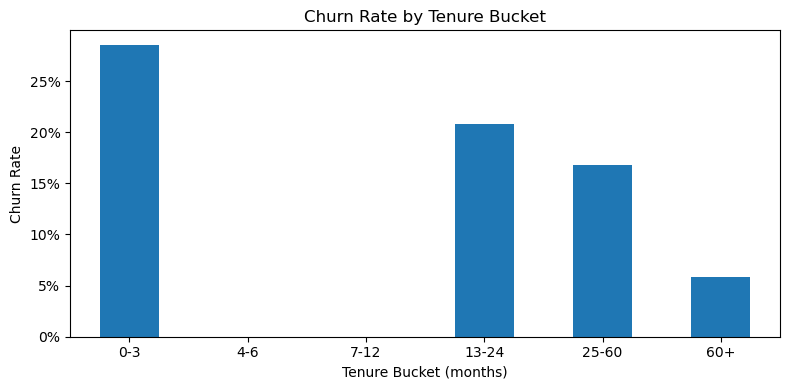

In [9]:
group = df.groupby('tenure_bucket')['churn'].mean().reindex(['0-3','4-6','7-12','13-24','25-60','60+'])
ax = group.plot(kind='bar', figsize=(8,4))
ax.set_title('Churn Rate by Tenure Bucket')
ax.set_xlabel('Tenure Bucket (months)')
ax.set_ylabel('Churn Rate')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: "{:.0%}".format(y)))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Correlation matrix for numeric fields

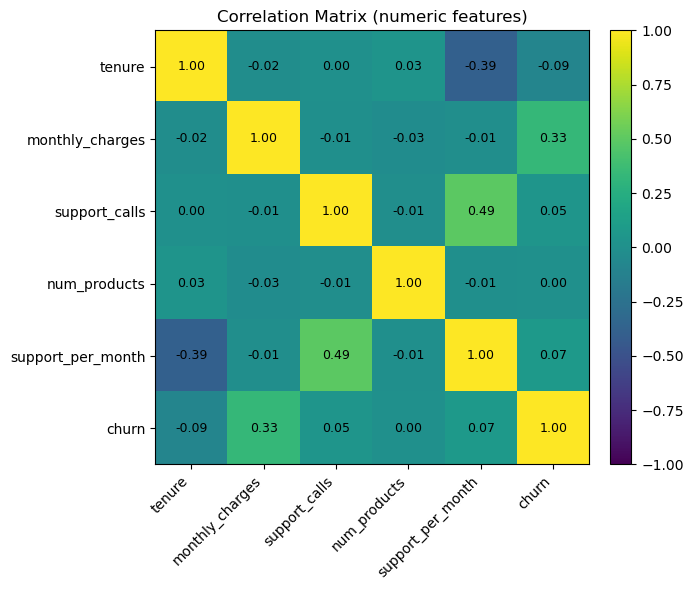

In [10]:
num_cols = ['tenure','monthly_charges','support_calls','num_products','support_per_month','churn']
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(7,6))
cax = ax.imshow(corr, vmin=-1, vmax=1)
ax.set_xticks(range(len(num_cols))); ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha='right'); ax.set_yticklabels(num_cols)
# annotate values
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        ax.text(j, i, f"{corr.iloc[i,j]:.2f}", ha='center', va='center', fontsize=9)
fig.colorbar(cax, fraction=0.046, pad=0.04)
ax.set_title('Correlation Matrix (numeric features)')
plt.tight_layout()
plt.show()

# Support calls vs monthly charges colored by churn

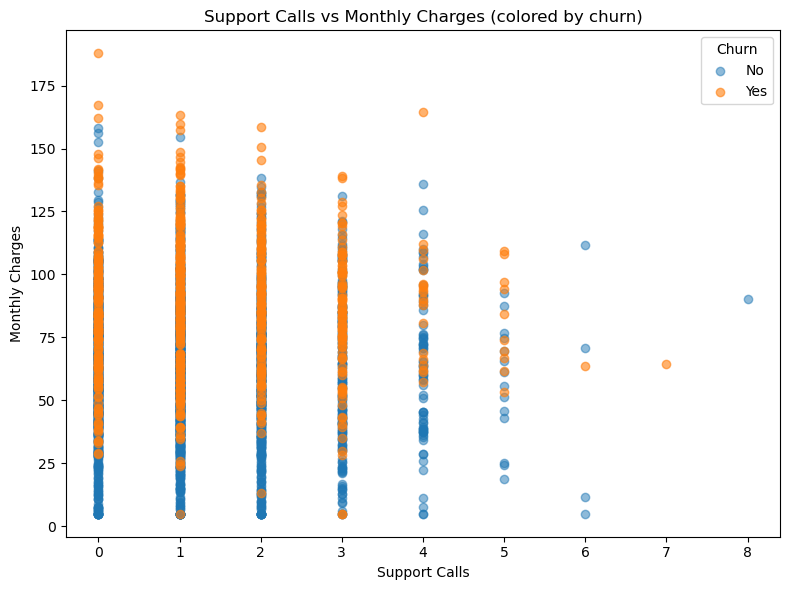

In [11]:
plt.figure(figsize=(8,6))
mask_no = df['churn']==0
mask_yes = df['churn']==1
plt.scatter(df[mask_no]['support_calls'], df[mask_no]['monthly_charges'], alpha=0.5, label='No')
plt.scatter(df[mask_yes]['support_calls'], df[mask_yes]['monthly_charges'], alpha=0.6, label='Yes')
plt.title('Support Calls vs Monthly Charges (colored by churn)')
plt.xlabel('Support Calls')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

# Joining of two Tables

In [17]:
import pandas as pd

In [18]:
df_clean = pd.read_csv(r'C:\Users\hp\Downloads\churn_cleaned.csv')          
df_preds = pd.read_csv(r'C:\Users\hp\Downloads\predictions_for_powerbi.csv')


In [19]:
print(df_clean.columns)
print(df_preds.columns)


Index(['customerID', 'tenure', 'monthly_charges', 'total_charges', 'contract',
       'payment_method', 'internet_service', 'support_calls', 'num_products',
       'autopay', 'senior_citizen', 'gender', 'partner', 'dependents',
       'paperless_billing', 'churn', 'tenure_bucket', 'high_monthly_flag',
       'support_per_month', 'churn_label'],
      dtype='object')
Index(['tenure', 'monthly_charges', 'contract', 'payment_method',
       'internet_service', 'support_calls', 'num_products', 'autopay',
       'senior_citizen', 'gender', 'partner', 'dependents',
       'paperless_billing', 'tenure_bucket', 'high_monthly_flag',
       'support_per_month', 'actual_churn', 'pred_proba_rf', 'pred_proba_lr',
       'pred_rf', 'pred_lr', 'revenue_loss_estimate'],
      dtype='object')


In [22]:
# Reset index so both start at 0–N
df_clean = df_clean.reset_index(drop=True)
df_preds = df_preds.reset_index(drop=True)

# Concatenate side-by-side
df_joined = pd.concat([df_clean, df_preds], axis=1)

In [23]:
df_joined.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,...,paperless_billing,tenure_bucket,high_monthly_flag,support_per_month,actual_churn,pred_proba_rf,pred_proba_lr,pred_rf,pred_lr,revenue_loss_estimate
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,...,1.0,0-3,0.0,0.0,0.0,0.15,0.147670,0.0,0.0,36.0135
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,...,1.0,7-12,0.0,0.0,0.0,0.02,0.036445,0.0,0.0,0.6558
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,...,1.0,0-3,1.0,0.0,0.0,0.31,0.422950,0.0,0.0,88.7220
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,...,0.0,25-60,0.0,0.0,0.0,0.07,0.122592,0.0,0.0,15.3888
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,...,1.0,4-6,1.0,0.4,1.0,0.28,0.433190,0.0,0.0,79.4304


In [24]:
df_joined.to_csv("output_churn/churn_final_joined_by_index.csv", index=False)

In [25]:
df_joined.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,...,paperless_billing,tenure_bucket,high_monthly_flag,support_per_month,actual_churn,pred_proba_rf,pred_proba_lr,pred_rf,pred_lr,revenue_loss_estimate
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,...,1.0,0-3,0.0,0.0,0.0,0.15,0.147670,0.0,0.0,36.0135
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,...,1.0,7-12,0.0,0.0,0.0,0.02,0.036445,0.0,0.0,0.6558
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,...,1.0,0-3,1.0,0.0,0.0,0.31,0.422950,0.0,0.0,88.7220
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,...,0.0,25-60,0.0,0.0,0.0,0.07,0.122592,0.0,0.0,15.3888
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,...,1.0,4-6,1.0,0.4,1.0,0.28,0.433190,0.0,0.0,79.4304


# Top 10 high-risk customers

In [31]:
preds = pd.read_csv(r'C:\Users\hp\Desktop\output_churn\churn_final_joined_by_index.csv')   
topN = preds.sort_values('pred_proba_rf', ascending=False).head(10)
display_cols = ['customerID','monthly_charges','pred_proba_rf','pred_rf','revenue_loss_estimate']
print("Top 10 predicted high-risk customers (Random Forest):")
topN[display_cols].reset_index(drop=True)

Top 10 predicted high-risk customers (Random Forest):


,customerID,monthly_charges,pred_proba_rf,pred_rf,revenue_loss_estimate
0,CUST100043,50.50,0.86,1.0,357.2010
1,CUST100363,28.02,0.81,1.0,261.4194
2,CUST100436,46.90,0.73,1.0,204.2175
3,CUST100033,68.54,0.73,1.0,260.3691
4,CUST100212,42.24,0.72,1.0,211.6152
5,CUST100486,127.12,0.71,1.0,288.7215
6,CUST100170,75.26,0.71,1.0,209.5494
7,CUST100042,25.10,0.70,1.0,247.6950
8,CUST100478,98.54,0.69,1.0,289.2618
9,CUST100162,86.47,0.69,1.0,261.0891


# ROC curve for model

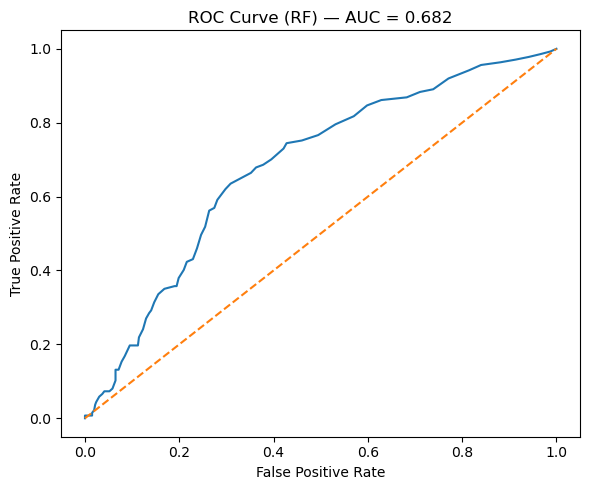

In [32]:
# Cell 11: ROC curve
from sklearn.metrics import roc_curve, auc
preds = pd.read_csv('output_churn/predictions_for_powerbi.csv')
fpr, tpr, _ = roc_curve(preds['actual_churn'], preds['pred_proba_rf'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'--')   # diagonal
plt.title(f'ROC Curve (RF) — AUC = {roc_auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()

# Cohort-ish retention view (tenure progression)

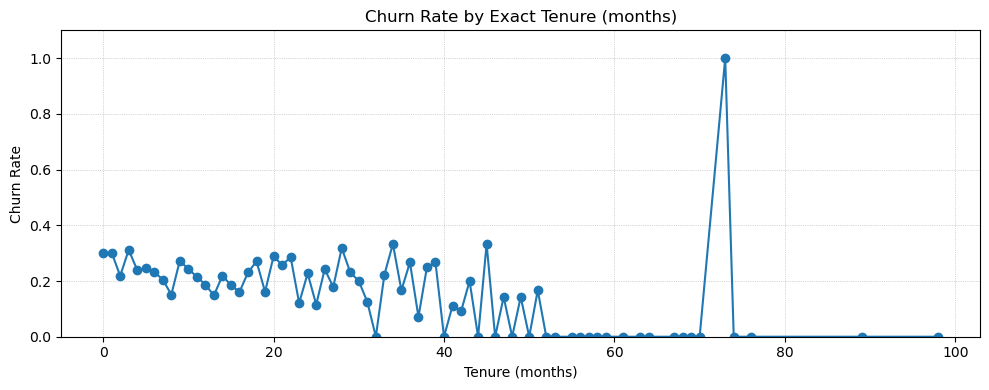

In [33]:
churn_by_tenure = df.groupby('tenure')['churn'].mean().reset_index()
plt.figure(figsize=(10,4))
plt.plot(churn_by_tenure['tenure'], churn_by_tenure['churn'], marker='o')
plt.title('Churn Rate by Exact Tenure (months)')
plt.xlabel('Tenure (months)')
plt.ylabel('Churn Rate')
plt.ylim(0, churn_by_tenure['churn'].max()*1.1)
plt.grid(True, linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()

In [3]:
customer_id = [f"CUST{100000+i}" for i in range(n)]

In [4]:
tenure = np.random.exponential(scale=12, size=n).astype(int)
monthly_charges = np.round(np.random.normal(loc=70, scale=30, size=n).clip(5, 300), 2)
total_charges = np.round((tenure * monthly_charges) + np.random.normal(0, 50, n), 2)
contract_type = np.random.choice(["Month-to-month","One year","Two year"], p=[0.55,0.25,0.20], size=n)
payment_method = np.random.choice(["Electronic check","Mailed check","Bank transfer","Credit card"], size=n)
internet_service = np.random.choice(["DSL","Fiber optic","No"], p=[0.35,0.45,0.20], size=n)
support_calls = np.random.poisson(lam=1.2, size=n)

In [39]:
df.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,senior_citizen,gender,partner,dependents,paperless_billing,churn,tenure_bucket,high_monthly_flag,support_per_month,churn_label
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,0,Male,1,0,0,0,4-6,1,0.000000,No
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,1,0,25-60,0,0.027778,No
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,0,0,13-24,1,0.066667,No
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,0,Male,0,0,1,0,7-12,0,0.100000,No
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,0,Male,1,0,0,0,0-3,1,0.000000,No


In [5]:
num_products = np.random.choice([1,2,3], p=[0.6,0.3,0.1], size=n)
autopay = np.random.choice([0,1], p=[0.4,0.6], size=n)

In [6]:
paperless_billing = np.random.choice([0,1], p=[0.4,0.6], size=n)
senior_citizen = np.random.choice([0,1], p=[0.88,0.12], size=n)
gender = np.random.choice(["Male","Female"], size=n)
partner = np.random.choice([0,1], size=n)
dependents = np.random.choice([0,1], size=n)

# churn probability (logistic model)

In [7]:
logit = (-1.5 + 0.03*(monthly_charges-70) - 0.02*tenure +
         0.6*(contract_type=="Month-to-month").astype(int) +
         0.4*(internet_service=="Fiber optic").astype(int) +
         0.5*(support_calls>2).astype(int) -0.7*autopay + 0.25*paperless_billing)
prob = 1 / (1 + np.exp(-logit))
churn = np.random.binomial(1, prob, size=n)

In [8]:
df = pd.DataFrame({
    'customerID': customer_id, 'tenure':tenure, 'monthly_charges':monthly_charges,
    'total_charges':total_charges, 'contract':contract_type, 'payment_method':payment_method,
    'internet_service':internet_service, 'support_calls':support_calls, 'num_products':num_products,
    'autopay':autopay, 'paperless_billing':paperless_billing, 'senior_citizen':senior_citizen,
    'gender':gender, 'partner':partner, 'dependents':dependents, 'churn':churn
})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         3000 non-null   object  
 1   tenure             3000 non-null   int64   
 2   monthly_charges    3000 non-null   float64 
 3   total_charges      3000 non-null   float64 
 4   contract           3000 non-null   object  
 5   payment_method     3000 non-null   object  
 6   internet_service   3000 non-null   object  
 7   support_calls      3000 non-null   int64   
 8   num_products       3000 non-null   int64   
 9   autopay            3000 non-null   int64   
 10  senior_citizen     3000 non-null   int64   
 11  gender             3000 non-null   object  
 12  partner            3000 non-null   int64   
 13  dependents         3000 non-null   int64   
 14  paperless_billing  3000 non-null   int64   
 15  churn              3000 non-null   int64   
 16  tenure

# features

In [35]:
df['tenure_bucket'] = pd.cut(df.tenure, bins=[-1,3,6,12,24,60,200], labels=['0-3','4-6','7-12','13-24','25-60','60+'])
df['high_monthly_flag'] = (df.monthly_charges > df.monthly_charges.quantile(0.75)).astype(int)
df['support_per_month'] = df.apply(lambda r: r.support_calls / max(1, r.tenure), axis=1)


In [36]:
df.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,senior_citizen,gender,partner,dependents,paperless_billing,churn,tenure_bucket,high_monthly_flag,support_per_month,churn_label
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,0,Male,1,0,0,0,4-6,1,0.000000,No
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,1,0,25-60,0,0.027778,No
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,0,0,13-24,1,0.066667,No
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,0,Male,0,0,1,0,7-12,0,0.100000,No
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,0,Male,1,0,0,0,0-3,1,0.000000,No


In [37]:
os.makedirs('output_churn', exist_ok=True)
df.to_csv('output_churn/churn_cleaned.csv', index=False)

In [38]:
df.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,senior_citizen,gender,partner,dependents,paperless_billing,churn,tenure_bucket,high_monthly_flag,support_per_month,churn_label
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,0,Male,1,0,0,0,4-6,1,0.000000,No
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,1,0,25-60,0,0.027778,No
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,0,0,13-24,1,0.066667,No
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,0,Male,0,0,1,0,7-12,0,0.100000,No
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,0,Male,1,0,0,0,0-3,1,0.000000,No


 # Modelling

In [12]:
X = df.drop(columns=['customerID','churn','total_charges'])
y = df.churn
numeric_features = ['tenure','monthly_charges','support_calls','num_products','support_per_month']
categorical_features = ['contract','payment_method','internet_service','autopay','paperless_billing','senior_citizen','gender','partner','dependents','tenure_bucket','high_monthly_flag']

num_pipe = Pipeline([('scaler', StandardScaler())])
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore'))])
preproc = ColumnTransformer([('num', num_pipe, numeric_features), ('cat', cat_pipe, categorical_features)])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

pipe_lr = Pipeline([('preproc', preproc), ('clf', LogisticRegression(max_iter=1000))])
pipe_rf = Pipeline([('preproc', preproc), ('clf', RandomForestClassifier(n_estimators=100, random_state=42))])

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)


Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'monthly_charges',
                                                   'support_calls',
                                                   'num_products',
                                                   'support_per_month']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['contract', 'payment_method',
                                                   'internet_service',
                                                   'autopay',
                                                   'paperless_billing',
                                                   'senior_citizen', 'gender',
                                                   'partner', 'dependents',
                                                   'tenure_bucket',
                                                   'high_monthly_flag'])])),
                ('clf', RandomForestClassifier(random_state=42))])

# Evaluate

In [13]:
for name, pipe in [('LR', pipe_lr), ('RF', pipe_rf)]:
    preds = pipe.predict(X_test); probs = pipe.predict_proba(X_test)[:,1]
    print(name, 'acc', accuracy_score(y_test,preds), 'roc_auc', roc_auc_score(y_test,probs),
          'precision', precision_score(y_test,preds), 'recall', recall_score(y_test,preds))

LR acc 0.7683333333333333 roc_auc 0.7303841970014662 precision 0.48333333333333334 recall 0.2116788321167883
RF acc 0.745 roc_auc 0.6817565543661617 precision 0.3709677419354839 recall 0.1678832116788321


# predictions CSV for Power BI

In [14]:
out = X_test.copy().reset_index(drop=True)
out['actual_churn'] = y_test.values

In [42]:
df.head()

,customerID,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,support_calls,num_products,autopay,senior_citizen,gender,partner,dependents,paperless_billing,churn,tenure_bucket,high_monthly_flag,support_per_month,churn_label
0,CUST100000,5,101.80,539.69,Month-to-month,Mailed check,Fiber optic,0,1,1,0,Male,1,0,0,0,4-6,1,0.000000,No
1,CUST100001,36,88.51,3205.13,Month-to-month,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,1,0,25-60,0,0.027778,No
2,CUST100002,15,90.51,1366.03,Two year,Bank transfer,Fiber optic,1,2,0,0,Female,1,1,0,0,13-24,1,0.066667,No
3,CUST100003,10,29.02,348.31,One year,Electronic check,Fiber optic,1,1,1,0,Male,0,0,1,0,7-12,0,0.100000,No
4,CUST100004,2,106.36,185.74,Month-to-month,Electronic check,DSL,0,2,0,0,Male,1,0,0,0,0-3,1,0.000000,No


In [15]:
out['pred_proba_rf'] = pipe_rf.predict_proba(X_test)[:,1]
out['pred_proba_lr'] = pipe_lr.predict_proba(X_test)[:,1]

In [16]:
out['pred_rf'] = pipe_rf.predict(X_test)
out['pred_lr'] = pipe_lr.predict(X_test)
out['revenue_loss_estimate'] = out['pred_proba_rf'] * out['monthly_charges'] * 3  

In [17]:
out.to_csv('output_churn/predictions_for_powerbi.csv', index=False)
joblib.dump(pipe_rf, 'output_churn/random_forest_pipeline.joblib')
joblib.dump(pipe_lr, 'output_churn/logistic_pipeline.joblib')

['output_churn/logistic_pipeline.joblib']

In [45]:
df.describe()

,tenure,monthly_charges,total_charges,support_calls,num_products,autopay,senior_citizen,partner,dependents,paperless_billing,churn,high_monthly_flag,support_per_month
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.551333,69.565787,795.016867,1.247667,1.490667,0.582333,0.122667,0.499333,0.296000,0.594333,0.229667,0.250000,0.363635
std,11.970789,29.611538,940.102173,1.141386,0.660852,0.493257,0.328109,0.500083,0.456567,0.491102,0.420689,0.433085,0.659203
min,0.000000,5.000000,-180.050000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,48.767500,160.265000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,69.635000,478.335000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.105263
75%,16.000000,89.555000,1087.630000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.250000,0.333333
max,98.000000,187.790000,7405.480000,8.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [47]:
out = X_test.copy().reset_index(drop=True)
out['actual_churn'] = y_test.values
out['pred_proba_rf'] = pipe_rf.predict_proba(X_test)[:,1]
out['pred_proba_lr'] = pipe_lr.predict_proba(X_test)[:,1]
out['pred_rf'] = pipe_rf.predict(X_test)
out['pred_lr'] = pipe_lr.predict(X_test)
out['revenue_loss_estimate'] = out['pred_proba_rf'] * out['monthly_charges'] * 3
out.to_csv('output_churn/predictions_for_powerbi.csv', index=False)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customerID         3000 non-null   object  
 1   tenure             3000 non-null   int64   
 2   monthly_charges    3000 non-null   float64 
 3   total_charges      3000 non-null   float64 
 4   contract           3000 non-null   object  
 5   payment_method     3000 non-null   object  
 6   internet_service   3000 non-null   object  
 7   support_calls      3000 non-null   int64   
 8   num_products       3000 non-null   int64   
 9   autopay            3000 non-null   int64   
 10  senior_citizen     3000 non-null   int64   
 11  gender             3000 non-null   object  
 12  partner            3000 non-null   int64   
 13  dependents         3000 non-null   int64   
 14  paperless_billing  3000 non-null   int64   
 15  churn              3000 non-null   int64   
 16  tenure

In [49]:
from sklearn.metrics import roc_curve, auc
import pandas as pd

y_test = [0, 1, 0, 1, 1, 0, 1, 0]  
y_pred_proba = [0.1, 0.9, 0.2, 0.8, 0.7, 0.3, 0.6, 0.4]  

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)



AUC Score: 1.0


In [52]:
# Save AUC value for Power BI
pd.DataFrame({"AUC":[roc_auc]}).to_csv("output_churn/auc_value.csv", index=False)



In [53]:
# Save ROC curve points for Power BI visual (optional)
pd.DataFrame({"FPR":fpr, "TPR":tpr}).to_csv("output_churn/roc_curve_points.csv", index=False)